In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.auxiliares import dataframe_coeficientes
from src.config import DADOS_TRATADOS
from src.graficos import (
    plot_coeficientes,
    plot_residuos
)

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

sns.set_theme(palette='bright')

RANDOM_STATE = 42

In [3]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [4]:
df['sexo'] = df['sexo'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   idade             442 non-null    int8    
 1   sexo              442 non-null    category
 2   imc               442 non-null    float32 
 3   pressao_media     442 non-null    float32 
 4   colesterol_total  442 non-null    int16   
 5   ldl               442 non-null    float32 
 6   hdl               442 non-null    float32 
 7   colesterol_hdl    442 non-null    float32 
 8   triglicerides     442 non-null    float32 
 9   glicose           442 non-null    int8    
 10  target            442 non-null    int16   
dtypes: category(1), float32(6), int16(2), int8(2)
memory usage: 13.6 KB


In [5]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [6]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', StandardScaler(), X.select_dtypes(include='number').columns),
        ('categoric', OneHotEncoder(drop='if_binary'), ['sexo'])
    ])),
    ('reg', LinearRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                                 ('categoric',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sexo'])])),
                ('reg', LinearRegression())])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                                 ('categoric',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sexo'])])),
                ('reg', LinearRegression())])

In [8]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
        'colesterol_hdl', 'triglicerides', 'glicose'],
       dtype='object')),
                                 ('categoric', OneHotEncoder(drop='if_binary'),
                                  ['sexo'])]),
 'reg': LinearRegression()}

In [9]:
pipeline['reg'].coef_

array([  1.75375723,  25.60712087,  16.82887089, -44.44885934,
        24.64095583,   7.67697872,  13.13878389,  35.16119782,
         2.35136418, -23.06446729])

In [10]:
pipeline['reg'].intercept_

np.float64(164.58272275712633)

In [11]:
pipeline['preprocessor']

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                ('categoric', OneHotEncoder(drop='if_binary'),
                                 ['sexo'])])

In [12]:
pipeline['preprocessor'].feature_names_in_

array(['idade', 'sexo', 'imc', 'pressao_media', 'colesterol_total', 'ldl',
       'hdl', 'colesterol_hdl', 'triglicerides', 'glicose'], dtype=object)

In [13]:
pipeline['preprocessor'].get_feature_names_out()

array(['numeric__idade', 'numeric__imc', 'numeric__pressao_media',
       'numeric__colesterol_total', 'numeric__ldl', 'numeric__hdl',
       'numeric__colesterol_hdl', 'numeric__triglicerides',
       'numeric__glicose', 'categoric__sexo_2'], dtype=object)

In [14]:
coefs = dataframe_coeficientes(
    pipeline['reg'].coef_,
    pipeline['preprocessor'].get_feature_names_out()
)

coefs

,coeficiente
numeric__colesterol_total,-44.448859
categoric__sexo_2,-23.064467
numeric__idade,1.753757
numeric__glicose,2.351364
numeric__hdl,7.676979
numeric__colesterol_hdl,13.138784
numeric__pressao_media,16.828871
numeric__ldl,24.640956
numeric__imc,25.607121
numeric__triglicerides,35.161198


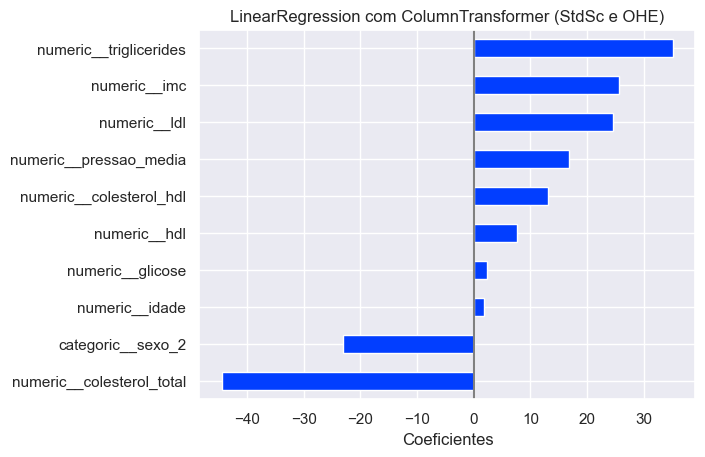

In [15]:
plot_coeficientes(coefs, 'LinearRegression com ColumnTransformer (StdSc e OHE)')

In [16]:
pipeline['preprocessor']['categoric']

OneHotEncoder(drop='if_binary')

In [17]:
pipeline['preprocessor']['categoric'].transform(X[['sexo']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 207 stored elements and shape (442, 1)>

In [18]:
y_pred = pipeline.predict(X_test)

In [19]:
mean_absolute_error(y_test, y_pred)

np.float64(42.79409657680721)

In [20]:
mean_squared_error(y_test, y_pred)

np.float64(2900.19385161844)

In [ ]:
root_mean_squared_error(y_test, y_pred)

np.float64(53.85344790835996)

In [22]:
r2_score(y_test, y_pred)

0.4526027208581844